In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from spacy.lang.en.stop_words import STOP_WORDS

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
#import dataset for reviews rated 4-4.99 stars
url = 'https://drive.google.com/file/d/1S3ERLLV3YDkb2XV_B7VzgLdoz9V3SZV9/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

df = pd.read_csv(path)
df.dropna(inplace=True)

In [ ]:
#stopwords
custom_stop = ['airbnb', 'air bnb', 't', 's', 'air', 'bnb', 'new', 'york', 'new york']
stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop).union(STOP_WORDS)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


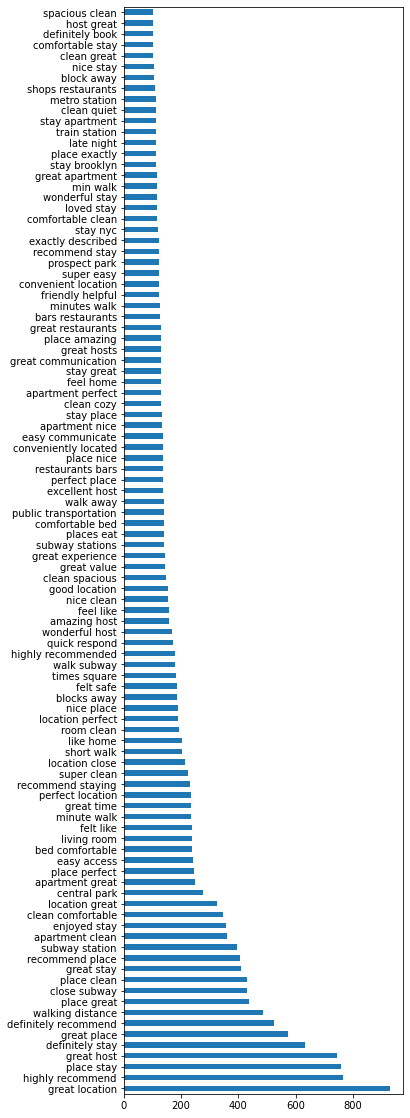

In [ ]:
#implement stopwords and vectorize

cvec = CountVectorizer(stop_words=stop_words, token_pattern=r'[^\s]+', ngram_range=(2,2))

comments = cvec.fit_transform(df['comments'])

commentsdf = pd.DataFrame(comments.todense(),
                         columns=cvec.get_feature_names())

commentsdf.sum().sort_values(ascending = False).head(100).plot(kind = 'barh', figsize=(5,20));